In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("shampoo.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [9]:
df['Month']=pd.to_datetime(df['Month'],format="%d-%m")

In [10]:
df.head()

,Month,Sales
0,1900-01-01,266.0
1,1900-02-01,145.9
2,1900-03-01,183.1
3,1900-04-01,119.3
4,1900-05-01,180.3


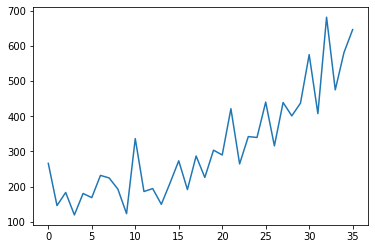

In [11]:
plt.plot(df["Sales"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [13]:
df.set_index(['Month'], inplace=True)

In [14]:
df

,Sales
Month,
1900-01-01,266.0
1900-02-01,145.9
1900-03-01,183.1
1900-04-01,119.3
1900-05-01,180.3
1900-06-01,168.5
1900-07-01,231.8
1900-08-01,224.5
1900-09-01,192.8


In [15]:
my_df_monthly=df.resample('M').mean()

In [16]:
my_df_monthly

,Sales
Month,
1900-01-31,266.666667
1900-02-28,245.266667
1900-03-31,236.366667
1900-04-30,277.300000
1900-05-31,257.666667
1900-06-30,297.633333
1900-07-31,344.433333
1900-08-31,311.900000
1900-09-30,388.233333


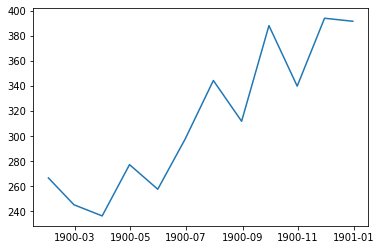

In [17]:
plt.plot(my_df_monthly)

In [18]:
!pip install pmdarima

In [20]:
import pmdarima as pm
model=pm.auto_arima(my_df_monthly["Sales"],m=1,seasonal=True, start_P=0,start_q=0,max_order=4,test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=100.262, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=116.911, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=107.622, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=102.121, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=102.190, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=101.886, Time=0.05 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.668 seconds


In [ ]:
ARIMA(2,2,0)(0,0,0)[0] 

In [22]:
result=model.summary()

In [25]:
print(result)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -47.131
Date:                Wed, 06 Oct 2021   AIC                            100.262
Time:                        14:43:46   BIC                            101.170
Sample:                             0   HQIC                            99.266
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5154      0.171     -8.887      0.000      -1.850      -1.181
ar.L2         -0.8502      0.211     -4.036      0.000      -1.263      -0.437
sigma2       505.1069    354.685      1.424      0.1

In [26]:
my_df_monthly

,Sales
Month,
1900-01-31,266.666667
1900-02-28,245.266667
1900-03-31,236.366667
1900-04-30,277.300000
1900-05-31,257.666667
1900-06-30,297.633333
1900-07-31,344.433333
1900-08-31,311.900000
1900-09-30,388.233333


In [49]:
train=my_df_monthly[(my_df_monthly.index.get_level_values(0) >="1900-01-31") & (my_df_monthly.index.get_level_values(0) <="1900-08-31")]
test=my_df_monthly[(my_df_monthly.index.get_level_values(0) >="1900-09-30")]

In [50]:
train.shape

(8, 1)

In [52]:
model.fit(train["Sales"])

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [65]:
forcast=model.predict(n_periods=4, return_conf_int=True)

In [66]:
forcast

(array([366.43285216, 389.50603525, 371.83917508, 430.08396403]),
 array([[324.7489866 , 408.11671772],
        [335.44962561, 443.56244489],
        [299.91641854, 443.76193161],
        [322.27286774, 537.89506033]]))

In [69]:
forcast_df=pd.DataFrame(forcast[0],index=test.index,columns=['Prediction'])

In [70]:
forcast_df

,Prediction
Month,
1900-09-30,366.432852
1900-10-31,389.506035
1900-11-30,371.839175
1900-12-31,430.083964


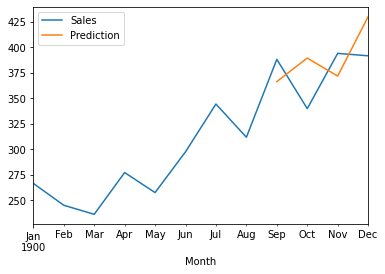

In [73]:
pd.concat([my_df_monthly['Sales'],forcast_df],axis=1).plot()

In [75]:
forcast1=model.predict(n_periods=8, return_conf_int=True)

In [77]:
forcast1

(array([366.43285216, 389.50603525, 371.83917508, 430.08396403,
        435.53366251, 435.25057172, 488.80553485, 484.25212062]),
 array([[324.7489866 , 408.11671772],
        [335.44962561, 443.56244489],
        [299.91641854, 443.76193161],
        [322.27286774, 537.89506033],
        [306.01610768, 565.05121733],
        [275.12441577, 595.37672767],
        [290.38539209, 687.22567761],
        [256.47446954, 712.02977171]]))

In [80]:
forcast_range=pd.date_range(start='1900-09-30',periods=8,freq='M')

In [81]:
forcast1_df=pd.DataFrame(forcast1[0],index=forcast_range,columns=['Prediction'])

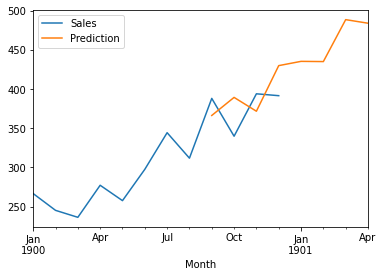

In [82]:
pd.concat([my_df_monthly['Sales'],forcast1_df],axis=1).plot()

In [84]:
lower=pd.Series(forcast1[1][:,0],index=forcast_range)
upper=pd.Series(forcast1[1][:,1],index=forcast_range)

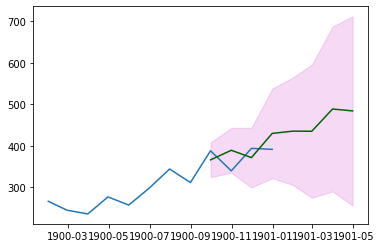

In [86]:
plt.plot(my_df_monthly['Sales'])
plt.plot(forcast1_df,color='darkgreen')
plt.fill_between(forcast_range,lower,upper,color='m',alpha=.15)

ValueError: ignored

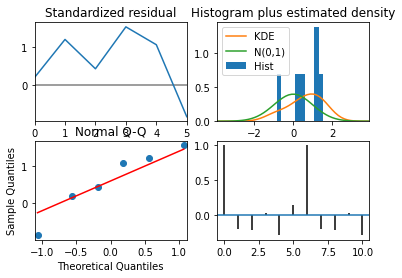

In [89]:
out=model.plot_diagnostics()